In [1]:
#Impoting all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import os


In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [3]:
le = preprocessing.LabelEncoder()


In [4]:
df1.drop(['case_id'],axis=1,inplace=True)
df2.drop(['case_id'],axis=1,inplace=True)

# Data Wrangling

This part involves feature engineering and cleaning the dataset. One hot encoding was done for categorical features while label encoder was used for age and length of stay.

In [5]:
df1.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [7]:
df1.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [8]:
df1.isna().sum(),df2.isna().sum()

(Hospital_code                           0
 Hospital_type_code                      0
 City_Code_Hospital                      0
 Hospital_region_code                    0
 Available Extra Rooms in Hospital       0
 Department                              0
 Ward_Type                               0
 Ward_Facility_Code                      0
 Bed Grade                             113
 patientid                               0
 City_Code_Patient                    4532
 Type of Admission                       0
 Severity of Illness                     0
 Visitors with Patient                   0
 Age                                     0
 Admission_Deposit                       0
 Stay                                    0
 dtype: int64,
 Hospital_code                           0
 Hospital_type_code                      0
 City_Code_Hospital                      0
 Hospital_region_code                    0
 Available Extra Rooms in Hospital       0
 Department                            

<AxesSubplot:>

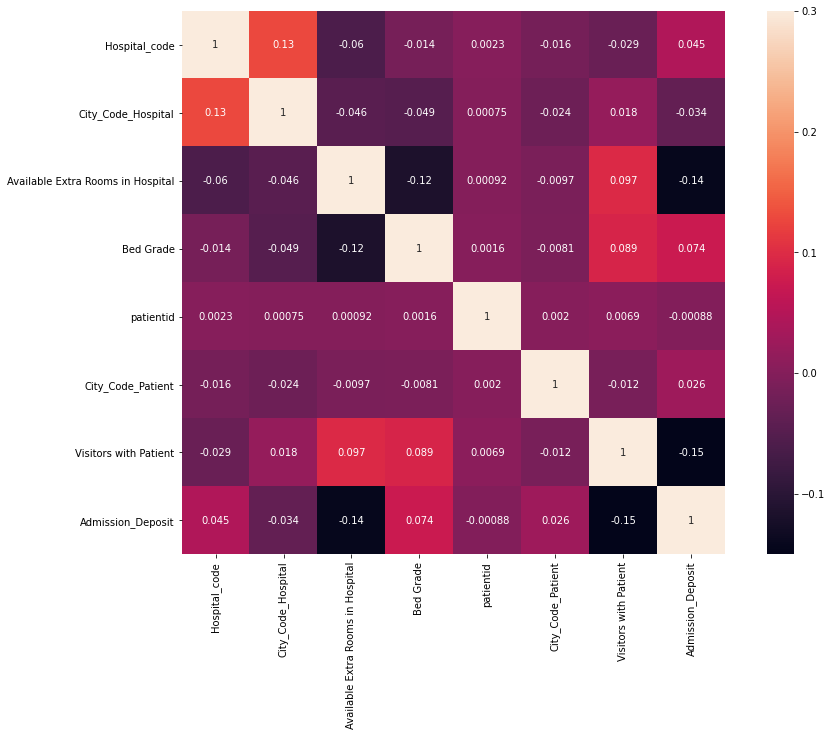

In [9]:
cor=df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,vmax=.3, square=True,annot=True)


### Hospital_Code

In [10]:
df1['Hospital_code'].nunique()

32

In [11]:
df1['Hospital_code'].isna().sum()

0

### Hospital_Type_Code

In [12]:
df1['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [13]:
dummy_variable_1 = pd.get_dummies(df1["Hospital_type_code"])
df1 = pd.concat([df1, dummy_variable_1], axis=1)

In [14]:
type_list=dummy_variable_1.columns.tolist()

In [15]:
for type in type_list:
         df1.rename(columns={ type :'Hospital_type_'+ type},inplace=True)

In [16]:
dummy_variable_1 = pd.get_dummies(df2["Hospital_type_code"])
df2 = pd.concat([df2, dummy_variable_1], axis=1)
type_list=dummy_variable_1.columns.tolist()
for type in type_list:
         df2.rename(columns={ type :'Hospital_type_'+ type},inplace=True)


In [17]:
#df1.drop(['Hospital_type_code'],axis=1,inplace=True)
#df2.drop(['Hospital_type_code'],axis=1,inplace=True)

### Hospital_region_code

In [18]:
df1['Hospital_region_code'].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [19]:
dummy_variable_2 = pd.get_dummies(df1["Hospital_region_code"])
df1 = pd.concat([df1, dummy_variable_2], axis=1)
region_list=dummy_variable_2.columns.tolist()
for region in region_list:
         df1.rename(columns={ region :'Hospital_region_'+ region},inplace=True)


In [20]:
dummy_variable_2 = pd.get_dummies(df2["Hospital_region_code"])
df2 = pd.concat([df2, dummy_variable_2], axis=1)
region_list=dummy_variable_2.columns.tolist()
for region in region_list:
         df2.rename(columns={ region :'Hospital_region_'+ region},inplace=True)


In [21]:
#df1.drop(['Hospital_region_code'],axis=1,inplace=True)
#df2.drop(['Hospital_region_code'],axis=1,inplace=True)

### Department

In [22]:
df1['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [23]:
dummy_variable_3 = pd.get_dummies(df1["Department"])
df1 = pd.concat([df1, dummy_variable_3], axis=1)
department_list=dummy_variable_3.columns.tolist()
for dep in department_list:
         df1.rename(columns={ dep : dep + '_Department'},inplace=True)


In [24]:
dummy_variable_3 = pd.get_dummies(df2["Department"])
df2 = pd.concat([df2, dummy_variable_3], axis=1)
department_list=dummy_variable_3.columns.tolist()
for dep in department_list:
         df2.rename(columns={ dep : dep + '_Department'},inplace=True)


In [25]:
#df1.drop(['Department'],axis=1,inplace=True)
#df2.drop(['Department'],axis=1,inplace=True)

### Ward_Type

In [26]:
df1['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [27]:
dummy_variable_4 = pd.get_dummies(df1["Ward_Type"])
df1 = pd.concat([df1, dummy_variable_4], axis=1)
ward_list=dummy_variable_4.columns.tolist()
for ward in ward_list:
         df1.rename(columns={ ward : 'Ward_Type_'+ ward},inplace=True)


In [28]:
dummy_variable_4 = pd.get_dummies(df2["Ward_Type"])
df2 = pd.concat([df2, dummy_variable_4], axis=1)
ward_list=dummy_variable_4.columns.tolist()
for ward in ward_list:
         df2.rename(columns={ ward : 'Ward_Type_'+ ward},inplace=True)


In [29]:
#df1.drop(['Ward_Type'],axis=1,inplace=True)
#df2.drop(['Ward_Type'],axis=1,inplace=True)

### Ward_Facility_Code

In [30]:
df1['Ward_Facility_Code'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [31]:
dummy_variable_5 = pd.get_dummies(df1["Ward_Facility_Code"])
df1 = pd.concat([df1, dummy_variable_5], axis=1)
fac_list=dummy_variable_5.columns.tolist()
for fac in fac_list:
         df1.rename(columns={ fac : 'Ward_Facility_'+ fac},inplace=True)


In [32]:
dummy_variable_5 = pd.get_dummies(df2["Ward_Facility_Code"])
df2 = pd.concat([df2, dummy_variable_5], axis=1)
fac_list=dummy_variable_5.columns.tolist()
for fac in fac_list:
         df2.rename(columns={ fac : 'Ward_Facility_'+ fac},inplace=True)


In [33]:
#df1.drop(['Ward_Facility_Code'],axis=1,inplace=True)
#df2.drop(['Ward_Facility_Code'],axis=1,inplace=True)

### Type of Admission

In [34]:
df1['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [35]:
dummy_variable_6 = pd.get_dummies(df1["Type of Admission"])
df1 = pd.concat([df1, dummy_variable_6], axis=1)
ad_list=dummy_variable_6.columns.tolist()
for ad in ad_list:
         df1.rename(columns={ad : ad+'_type'},inplace=True)


In [36]:
dummy_variable_6 = pd.get_dummies(df2["Type of Admission"])
df2 = pd.concat([df2, dummy_variable_6], axis=1)
ad_list=dummy_variable_6.columns.tolist()
for ad in ad_list:
         df2.rename(columns={ad : ad+'_type'},inplace=True)


In [37]:
#df1.drop(['Type of Admission'],axis=1,inplace=True)
#df2.drop(['Type of Admission'],axis=1,inplace=True)

### Severity of Illness

In [38]:
df1['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [39]:
dummy_variable_7 = pd.get_dummies(df1["Severity of Illness"])
df1 = pd.concat([df1, dummy_variable_7], axis=1)
sol_list=dummy_variable_7.columns.tolist()
for ill in sol_list:
         df1.rename(columns={ill : ill+'_type'},inplace=True)


In [40]:
dummy_variable_7 = pd.get_dummies(df2["Severity of Illness"])
df2 = pd.concat([df2, dummy_variable_7], axis=1)
sol_list=dummy_variable_7.columns.tolist()
for ill in sol_list:
         df2.rename(columns={ill : ill+'_type'},inplace=True)


In [41]:
#df1.drop(['Severity of Illness'],axis=1,inplace=True)
#df2.drop(['Severity of Illness'],axis=1,inplace=True)

### Age

In [42]:
age_list=df1['Age'].value_counts().index.tolist()
age_list

['41-50',
 '31-40',
 '51-60',
 '21-30',
 '71-80',
 '61-70',
 '11-20',
 '81-90',
 '0-10',
 '91-100']

In [43]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df1.Age.values.reshape(-1,1)).toarray()

In [44]:
dfOneHot = pd.DataFrame(X, columns = ["Age_"+ i for i in age_list] )

In [45]:
df1 = pd.concat([df1, dfOneHot], axis=1)
#df1= df1.drop(['Age'], axis=1)


In [46]:
X = onehotencoder.fit_transform(df2.Age.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Age_"+ i for i in age_list] )
df2 = pd.concat([df2, dfOneHot], axis=1)
#df2= df2.drop(['Age'], axis=1)


### Length of Stay

In [47]:
df1['Stay']=le.fit_transform(df1['Stay'])

### Bed Grade

In [48]:
#Replacing the missing bed grade values with mode
Mode=df1['Bed Grade'].mode()
Mode

0    2.0
dtype: float64

In [49]:
df1["Bed Grade"].replace(np.nan, 2.0, inplace=True)

In [50]:
Mode2=df2['Bed Grade'].mode()
Mode2

0    2.0
dtype: float64

In [51]:
df2["Bed Grade"].replace(np.nan, 2.0, inplace=True)

### City Code Patient

In [52]:
#Replacing the missing city_code_patient values with mean
Avg=df1['City_Code_Patient'].mean(axis=0)

In [53]:
df1["City_Code_Patient"].replace(np.nan, Avg, inplace=True)

In [54]:
Avg2=df2['City_Code_Patient'].mean(axis=0)

In [55]:
df2["City_Code_Patient"].replace(np.nan, Avg2, inplace=True)

# Exploratory Data Analysis

This part uses visualizations to look at the insights every feature is containing as well as its relationship with target variable.

### Correlation Matrix

In [56]:
corr=df1.corr()
corr.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_a,...,Age_41-50,Age_31-40,Age_51-60,Age_21-30,Age_71-80,Age_61-70,Age_11-20,Age_81-90,Age_0-10,Age_91-100
Hospital_code,1.000000,0.128294,-0.059638,-0.013374,0.002291,-0.015421,-0.028500,0.045446,0.042846,-0.072817,...,-0.007686,-0.004132,-0.006840,-0.004563,-0.002129,0.002538,0.009275,0.006597,0.006321,0.001909
City_Code_Hospital,0.128294,1.000000,-0.045771,-0.049400,0.000750,-0.023819,0.018184,-0.034455,0.006381,0.121383,...,-0.003270,-0.010193,-0.007768,-0.007969,-0.002740,0.004613,0.011476,0.013782,0.002606,-0.005247
Available Extra Rooms in Hospital,-0.059638,-0.045771,1.000000,-0.115913,0.000921,-0.009610,0.096714,-0.143739,-0.121120,0.052499,...,-0.030396,-0.013081,0.084771,0.129175,0.036752,-0.080235,-0.123252,-0.060441,-0.006888,-0.010419
Bed Grade,-0.013374,-0.049400,-0.115913,1.000000,0.001656,-0.007953,0.088950,0.073889,0.025692,-0.041291,...,0.026015,0.057834,0.032682,-0.043765,-0.072805,-0.014449,0.026394,0.047681,0.008518,-0.002058
patientid,0.002291,0.000750,0.000921,0.001656,1.000000,0.001988,0.006889,-0.000877,0.001125,0.002201,...,-0.000833,0.000192,-0.000276,0.004241,-0.000916,-0.000351,-0.005355,0.001446,0.002410,-0.003489


### Hospital Type Code

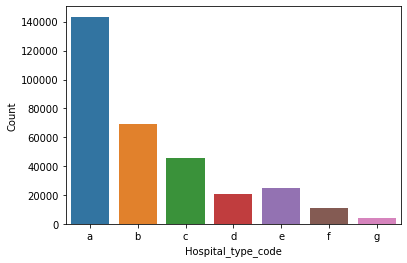

In [57]:
#Count
Grt=df1.groupby(['Hospital_type_code'],as_index=False)['Hospital_code'].count()
Grt.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grt, x='Hospital_type_code', y = "Count")
plt.show()

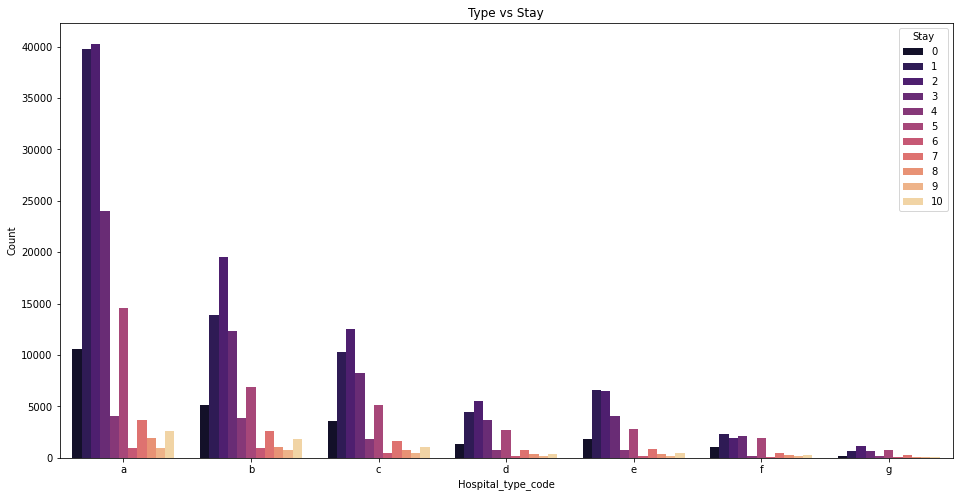

In [58]:
#Relationship with target
plt.figure(figsize=(16,8))
dft=df1[['Hospital_type_code','Stay','Hospital_code']]
typ=dft.groupby(['Hospital_type_code','Stay'],as_index=False).count()
typ.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Hospital_type_code', y='Count', hue='Stay', data=typ,palette='magma')
plt.title('Type vs Stay')
plt.show()


### Hospital Region Code
    

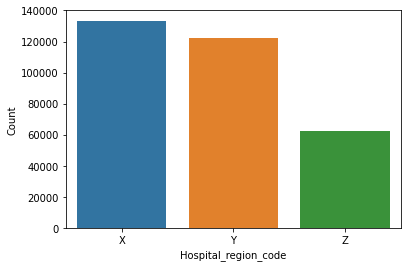

In [59]:
#Count
Grr=df1.groupby(['Hospital_region_code'],as_index=False)['Hospital_code'].count()
Grr.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grr, x='Hospital_region_code', y = "Count")
plt.show()

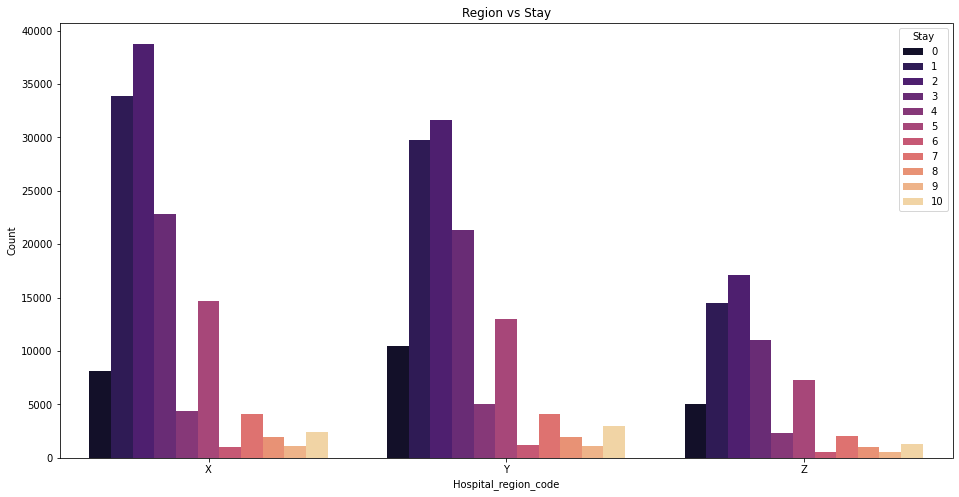

In [60]:
#Relationship with target
plt.figure(figsize=(16,8))
dfr=df1[['Hospital_region_code','Stay','Hospital_code']]
reg=dfr.groupby(['Hospital_region_code','Stay'],as_index=False).count()
reg.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Hospital_region_code', y='Count', hue='Stay', data=reg,palette='magma')
plt.title('Region vs Stay')
plt.show()


### Department

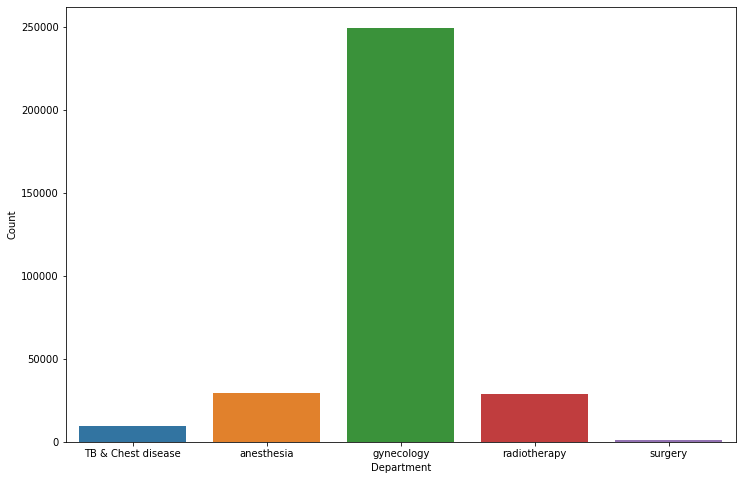

In [61]:
#Count
plt.figure(figsize=(12,8))
Grd=df1.groupby(['Department'],as_index=False)['Hospital_code'].count()
Grd.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grd, x='Department', y = "Count")
plt.show()

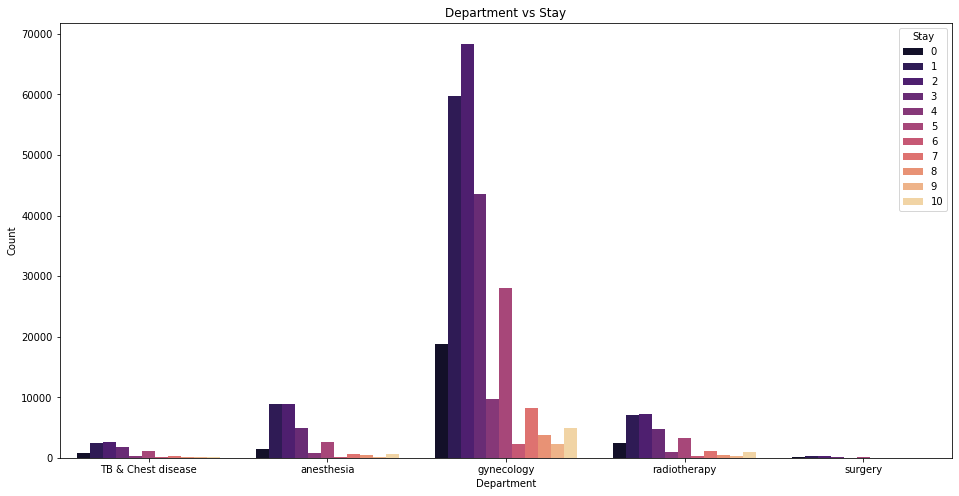

In [62]:
#Relationship with target
plt.figure(figsize=(16,8))
dfd=df1[['Department','Stay','Hospital_code']]
dep=dfd.groupby(['Department','Stay'],as_index=False).count()
dep.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Department', y='Count', hue='Stay', data=dep,palette='magma')
plt.title('Department vs Stay')
plt.show()


### Ward Type

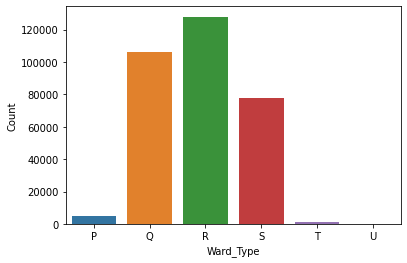

In [63]:
#Count
Grw=df1.groupby(['Ward_Type'],as_index=False)['Hospital_code'].count()
Grw.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grw, x='Ward_Type', y = "Count")
plt.show()

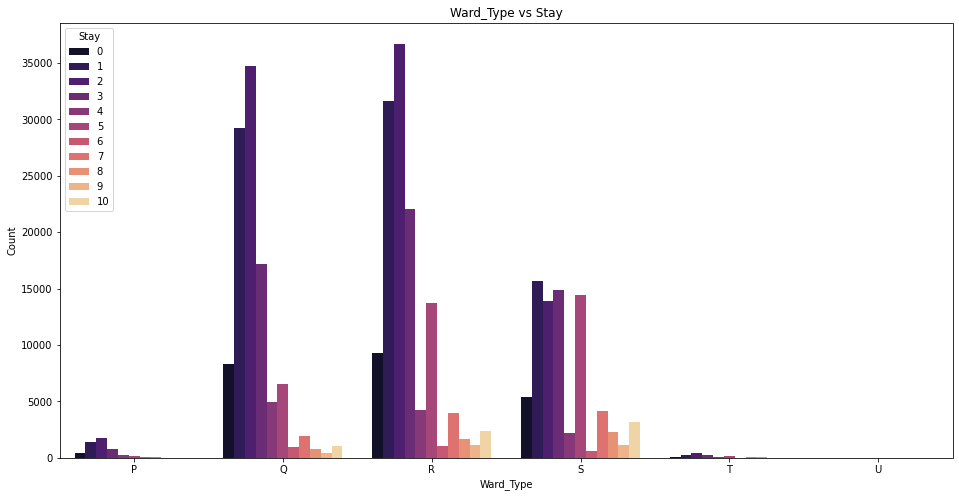

In [64]:
#Relationship with target
plt.figure(figsize=(16,8))
dfw=df1[['Ward_Type','Stay','Hospital_code']]
ward=dfw.groupby(['Ward_Type','Stay'],as_index=False).count()
ward.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Ward_Type', y='Count', hue='Stay', data=ward,palette='magma')
plt.title('Ward_Type vs Stay')
plt.show()


### Ward_Facility_Code

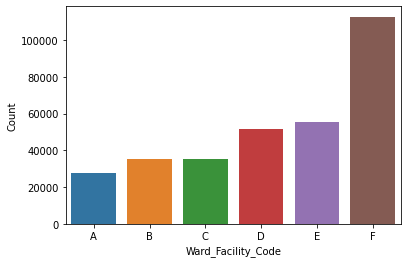

In [65]:
#Count
Grf=df1.groupby(['Ward_Facility_Code'],as_index=False)['Hospital_code'].count()
Grf.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grf, x='Ward_Facility_Code', y = "Count")
plt.show()

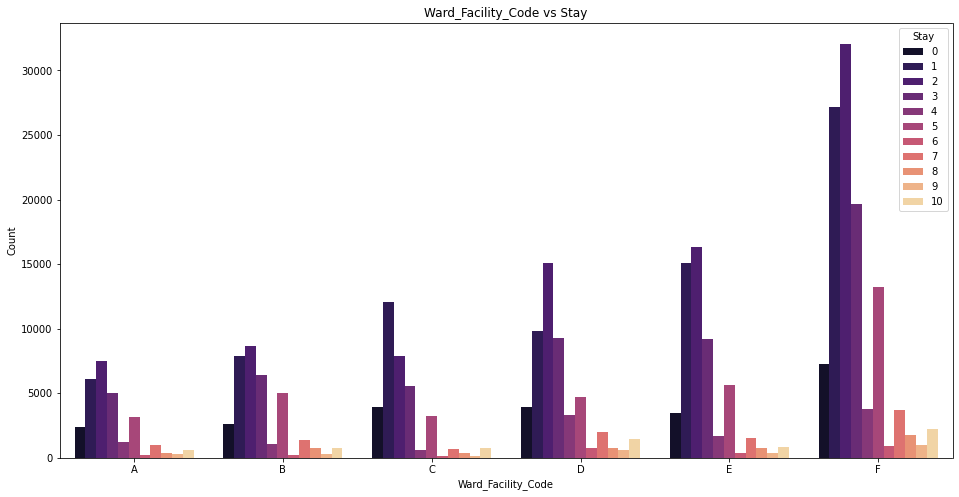

In [66]:
#Relationship with target
plt.figure(figsize=(16,8))
dff=df1[['Ward_Facility_Code','Stay','Hospital_code']]
fac=dff.groupby(['Ward_Facility_Code','Stay'],as_index=False).count()
fac.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Ward_Facility_Code', y='Count', hue='Stay', data=fac,palette='magma')
plt.title('Ward_Facility_Code vs Stay')
plt.show()


### Type of Admission

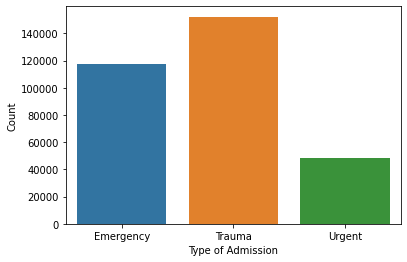

In [67]:
#Count
Gra=df1.groupby(['Type of Admission'],as_index=False)['Hospital_code'].count()
Gra.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Gra, x='Type of Admission', y = "Count")
plt.show()

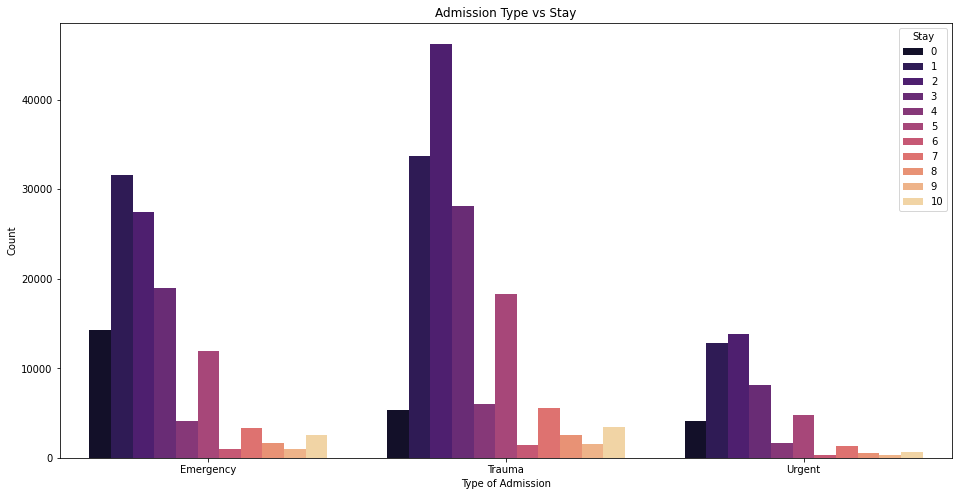

In [68]:
#Relationship with target
plt.figure(figsize=(16,8))
dfa=df1[['Type of Admission','Stay','Hospital_code']]
ad=dfa.groupby(['Type of Admission','Stay'],as_index=False).count()
ad.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Type of Admission', y='Count', hue='Stay', data=ad,palette='magma')
plt.title('Admission Type vs Stay')
plt.show()

### Severity of Illness

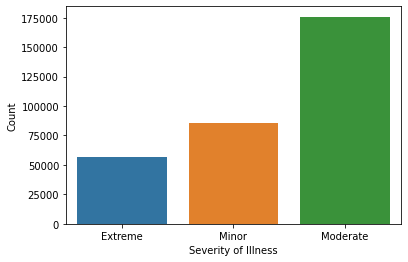

In [69]:
#Count
Grs=df1.groupby(['Severity of Illness'],as_index=False)['Hospital_code'].count()
Grs.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grs, x='Severity of Illness', y = "Count")
plt.show()

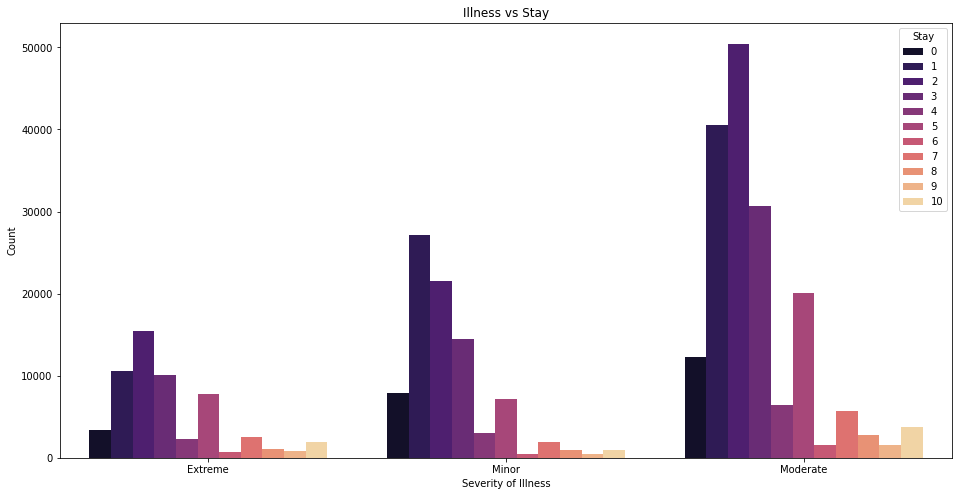

In [70]:
#Relationship with target
plt.figure(figsize=(16,8))
dfs=df1[['Severity of Illness','Stay','Hospital_code']]
se=dfs.groupby(['Severity of Illness','Stay'],as_index=False).count()
se.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Severity of Illness', y='Count', hue='Stay', data=se,palette='magma')
plt.title('Illness vs Stay')
plt.show()

### Age

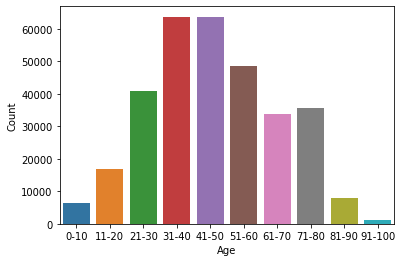

In [71]:
#Count
Grag=df1.groupby(['Age'],as_index=False)['Hospital_code'].count()
Grag.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grag, x='Age', y = "Count")
plt.show()

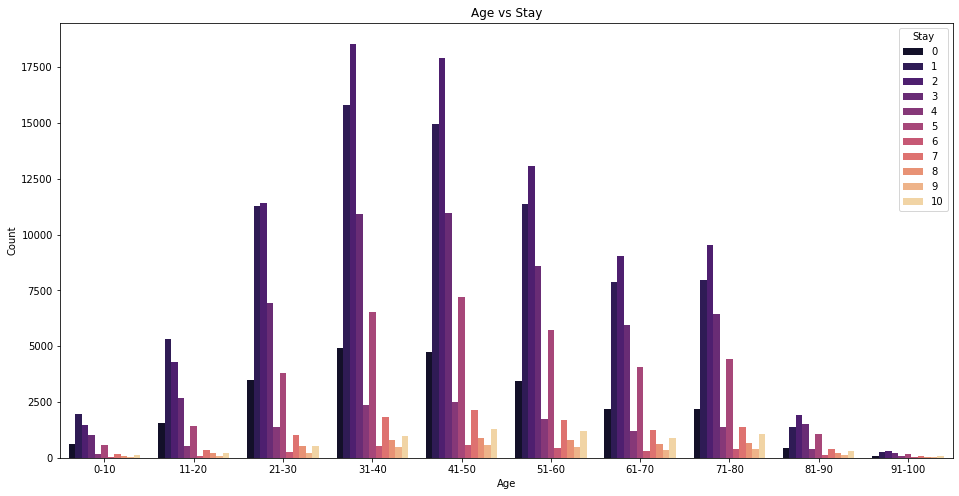

In [72]:
#Relationship with target
plt.figure(figsize=(16,8))
dfag=df1[['Age','Stay','Hospital_code']]
age=dfag.groupby(['Age','Stay'],as_index=False).count()
age.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Age', y='Count', hue='Stay', data=age,palette='magma')
plt.title('Age vs Stay')
plt.show()

### Bed Grade

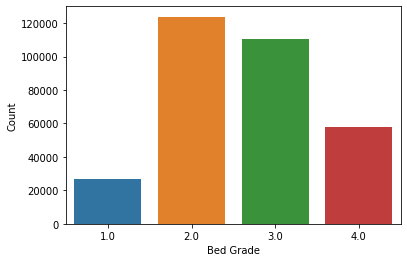

In [73]:
#Count
Grab=df1.groupby(['Bed Grade'],as_index=False)['Hospital_code'].count()
Grab.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grab, x='Bed Grade', y = "Count")
plt.show()

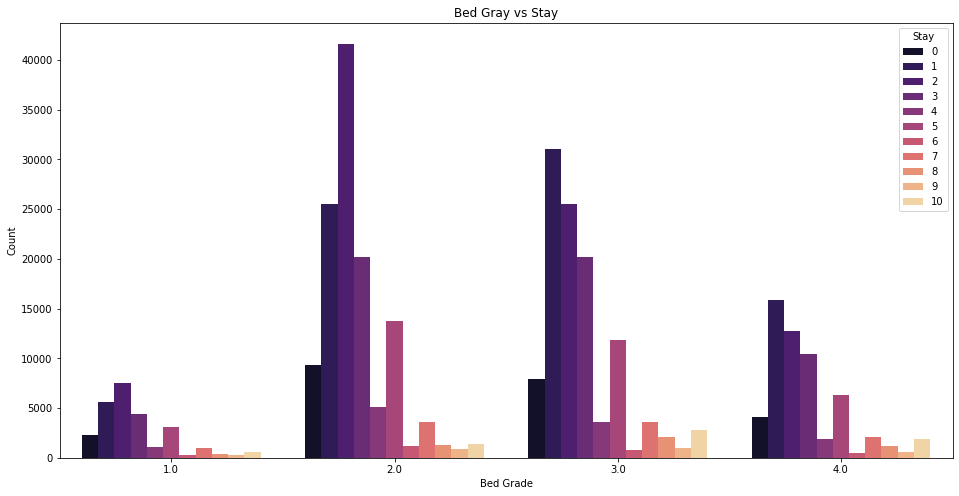

In [74]:
#Relationship with target
plt.figure(figsize=(16,8))
dfab=df1[['Bed Grade','Stay','Hospital_code']]
bed=dfab.groupby(['Bed Grade','Stay'],as_index=False).count()
bed.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Bed Grade', y='Count', hue='Stay', data=bed,palette='magma')
plt.title('Bed Gray vs Stay')
plt.show()

# Model Development

<AxesSubplot:>

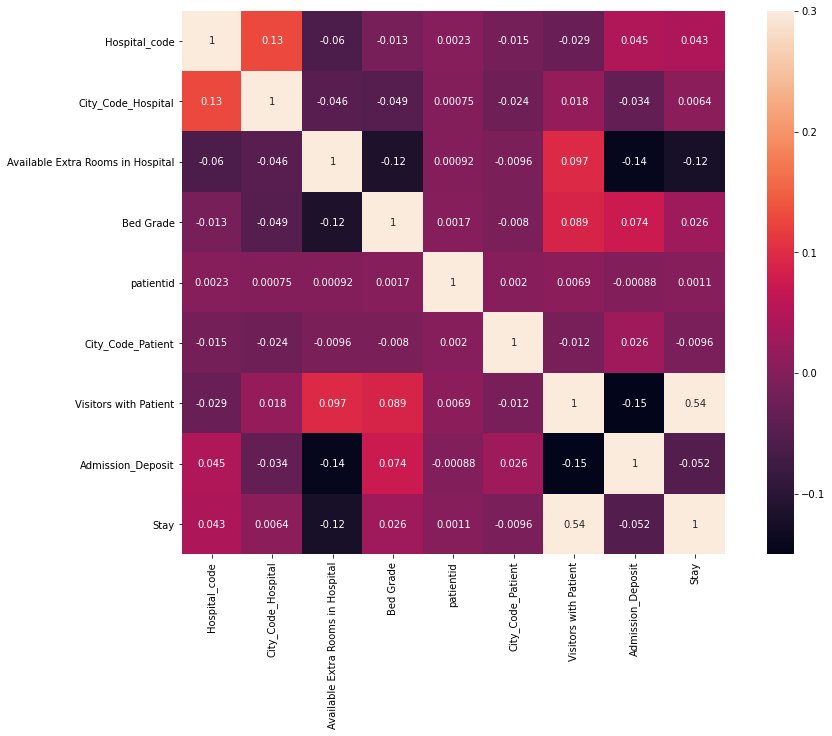

In [75]:
c=df1[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(c,vmax=.3, square=True,annot=True)



In [76]:
#Dropping the unnecessary attributes
df1.drop(['City_Code_Patient','City_Code_Hospital','patientid','Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age'],axis=1,inplace=True)
df2.drop(['City_Code_Patient','City_Code_Hospital','patientid','Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age'],axis=1,inplace=True)

In [77]:
df1.shape

(318438, 49)

In [78]:
df2.shape

(137057, 48)

In [79]:
#Importing the necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

### Data Normalization

In [80]:
scaler=preprocessing.MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

### Train Test Split

In [81]:
X=df1[['Hospital_code','Admission_Deposit','Bed Grade','Available Extra Rooms in Hospital', 'Visitors with Patient', 'Hospital_type_a', 'Hospital_type_b','Hospital_type_c', 'Hospital_type_d', 'Hospital_type_e','Hospital_type_f', 'Hospital_type_g', 'Hospital_region_X','Hospital_region_Y', 'Hospital_region_Z','TB & Chest disease_Department', 'anesthesia_Department','gynecology_Department', 'radiotherapy_Department','surgery_Department', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R','Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U', 'Ward_Facility_A','Ward_Facility_B', 'Ward_Facility_C', 'Ward_Facility_D','Ward_Facility_E', 'Ward_Facility_F', 'Emergency_type', 'Trauma_type','Urgent_type', 'Extreme_type', 'Minor_type', 'Moderate_type','Age_41-50', 'Age_31-40', 'Age_51-60', 'Age_21-30', 'Age_71-80','Age_61-70', 'Age_11-20', 'Age_81-90', 'Age_0-10', 'Age_91-100']]
Y= df1['Stay']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)


In [82]:
#This is the code for selecting the features with highest correlation with target though I haven't used it
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [83]:
#cor_support, cor_feature = cor_selector(X, Y,40)
#print(str(len(cor_feature)), 'selected features')

In [84]:
#X=df1[cor_feature]
#Y=df1['Stay']
#X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

### Random Forest Classification

In [85]:
rfclassifier=RandomForestClassifier(criterion= 'entropy', max_depth= 15, n_estimators=60,random_state=0)
rfclassifier.fit(X_train,y_train)
rfpred=rfclassifier.predict(X_test)

#### Classification Report

In [86]:
print (classification_report(y_test, rfpred))

              precision    recall  f1-score   support

           0       0.45      0.11      0.17      4761
           1       0.41      0.48      0.44     15654
           2       0.41      0.66      0.51     17480
           3       0.41      0.22      0.29     10973
           4       0.08      0.00      0.00      2377
           5       0.39      0.51      0.44      6943
           6       0.00      0.00      0.00       559
           7       0.34      0.01      0.02      2058
           8       0.49      0.06      0.10      1014
           9       0.50      0.00      0.01       540
          10       0.58      0.37      0.45      1329

    accuracy                           0.41     63688
   macro avg       0.37      0.22      0.22     63688
weighted avg       0.40      0.41      0.37     63688



#### Confusion Matrix

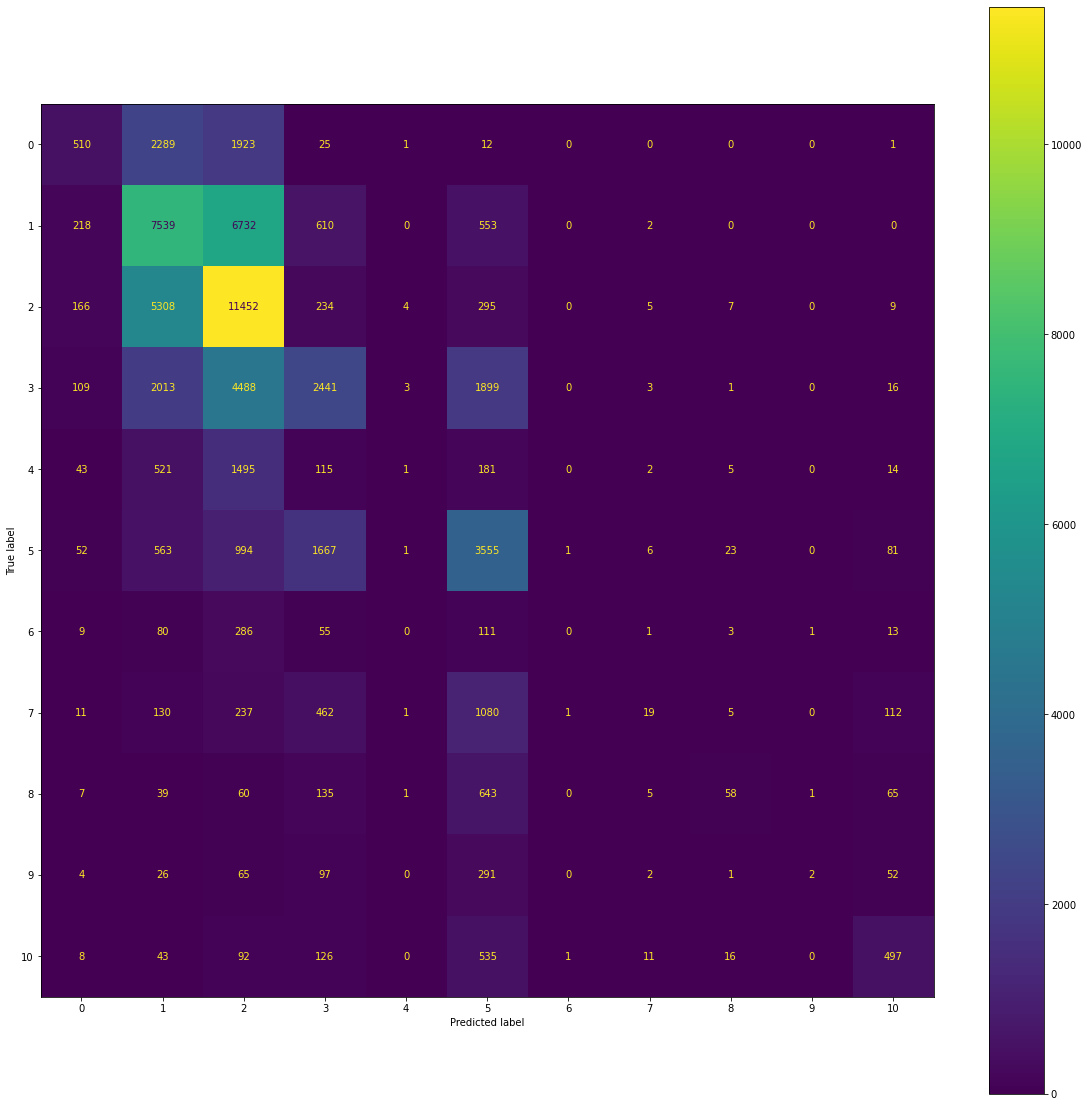

<Figure size 432x288 with 0 Axes>

In [87]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(rfclassifier,X_test,y_test,ax=ax)

#### GridSearchCV for Random Forest Classifier

In [89]:
# parameters={
#     'n_estimators':[10,20,30,40,50,60],
#     'max_depth':range(15,35),
#     'criterion' :['entropy']
# }
# rfcv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5,n_jobs=-1)
# rfcv.fit(X_train,y_train)

In [90]:
#rfcv.best_params_

In [91]:
# rfcv.best_estimator_.fit(X_train,y_train)
# rfcv1pred=rfcv.best_estimator_.predict(X_test)

In [92]:
#rfcv.best_estimator_.score(X_test,y_test)

### Decision Trees

In [490]:
tree= DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth=15)
tree.fit(X_train,y_train)
treepred=tree.predict(X_test)


### Classification Report

In [491]:
print (classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.30      0.16      0.21      4761
           1       0.39      0.46      0.42     15654
           2       0.42      0.60      0.49     17480
           3       0.36      0.24      0.29     10973
           4       0.07      0.01      0.02      2377
           5       0.38      0.42      0.40      6943
           6       0.04      0.01      0.01       559
           7       0.19      0.04      0.07      2058
           8       0.30      0.23      0.26      1014
           9       0.12      0.04      0.06       540
          10       0.51      0.33      0.40      1329

    accuracy                           0.39     63688
   macro avg       0.28      0.23      0.24     63688
weighted avg       0.36      0.39      0.36     63688



### Confusion Matrix

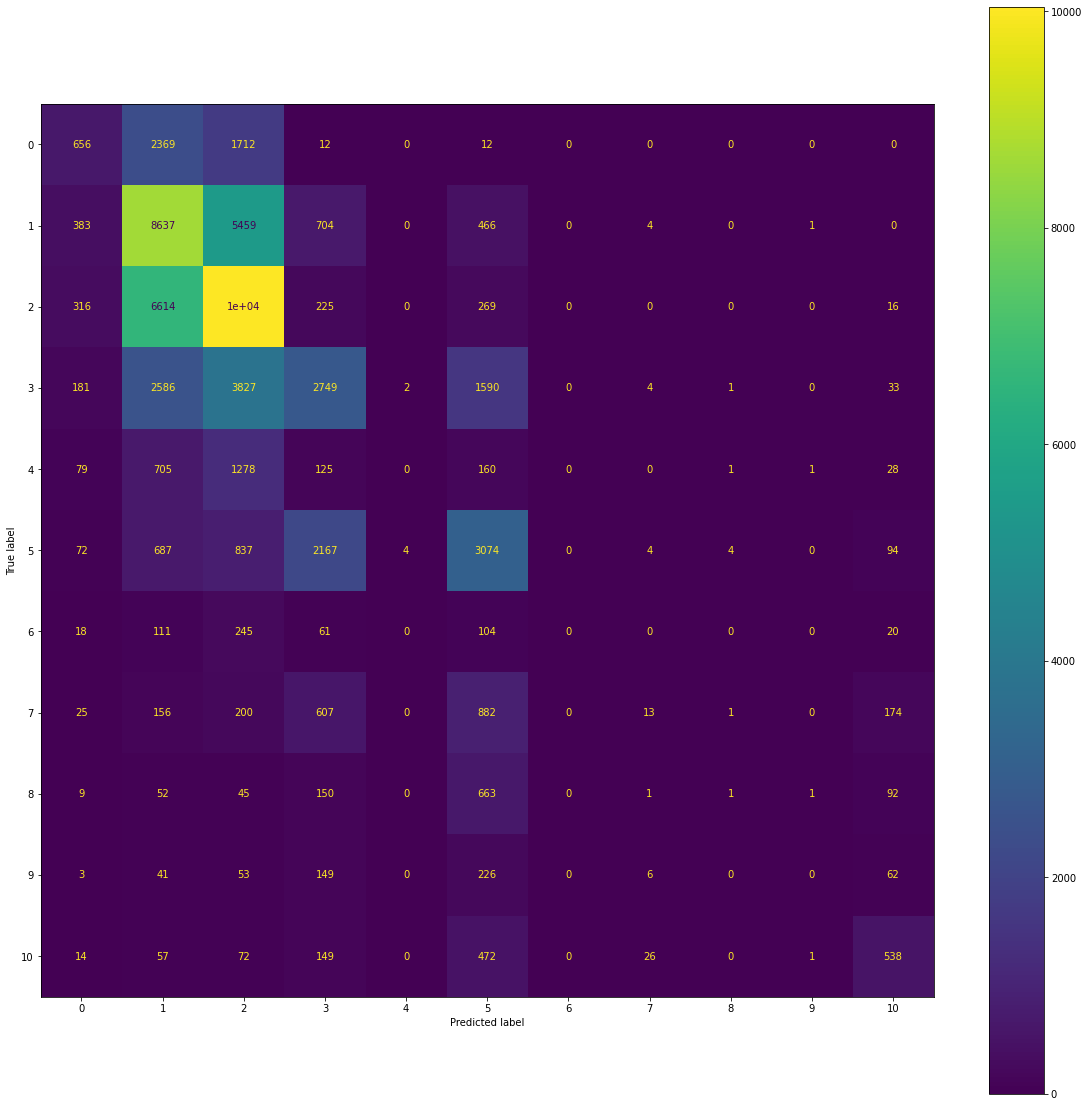

<Figure size 432x288 with 0 Axes>

In [261]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(tree,X_test,y_test,ax=ax)

## Boosting Algorithms

### AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
svc=SVC(probability=True, kernel='linear')
ada =AdaBoostClassifier(n_estimators=40,learning_rate=1, random_state=0)
ada.fit(X_train,y_train)
adapred=ada.predict(X_test)

#### Classification Report

In [95]:
print (classification_report(y_test, adapred))

              precision    recall  f1-score   support

           0       0.22      0.06      0.09      4761
           1       0.38      0.44      0.40     15654
           2       0.41      0.63      0.50     17480
           3       0.32      0.21      0.25     10973
           4       0.10      0.00      0.00      2377
           5       0.36      0.44      0.40      6943
           6       0.00      0.00      0.00       559
           7       0.00      0.00      0.00      2058
           8       0.11      0.02      0.04      1014
           9       0.00      0.00      0.00       540
          10       0.40      0.33      0.36      1329

    accuracy                           0.38     63688
   macro avg       0.21      0.19      0.19     63688
weighted avg       0.33      0.38      0.34     63688



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

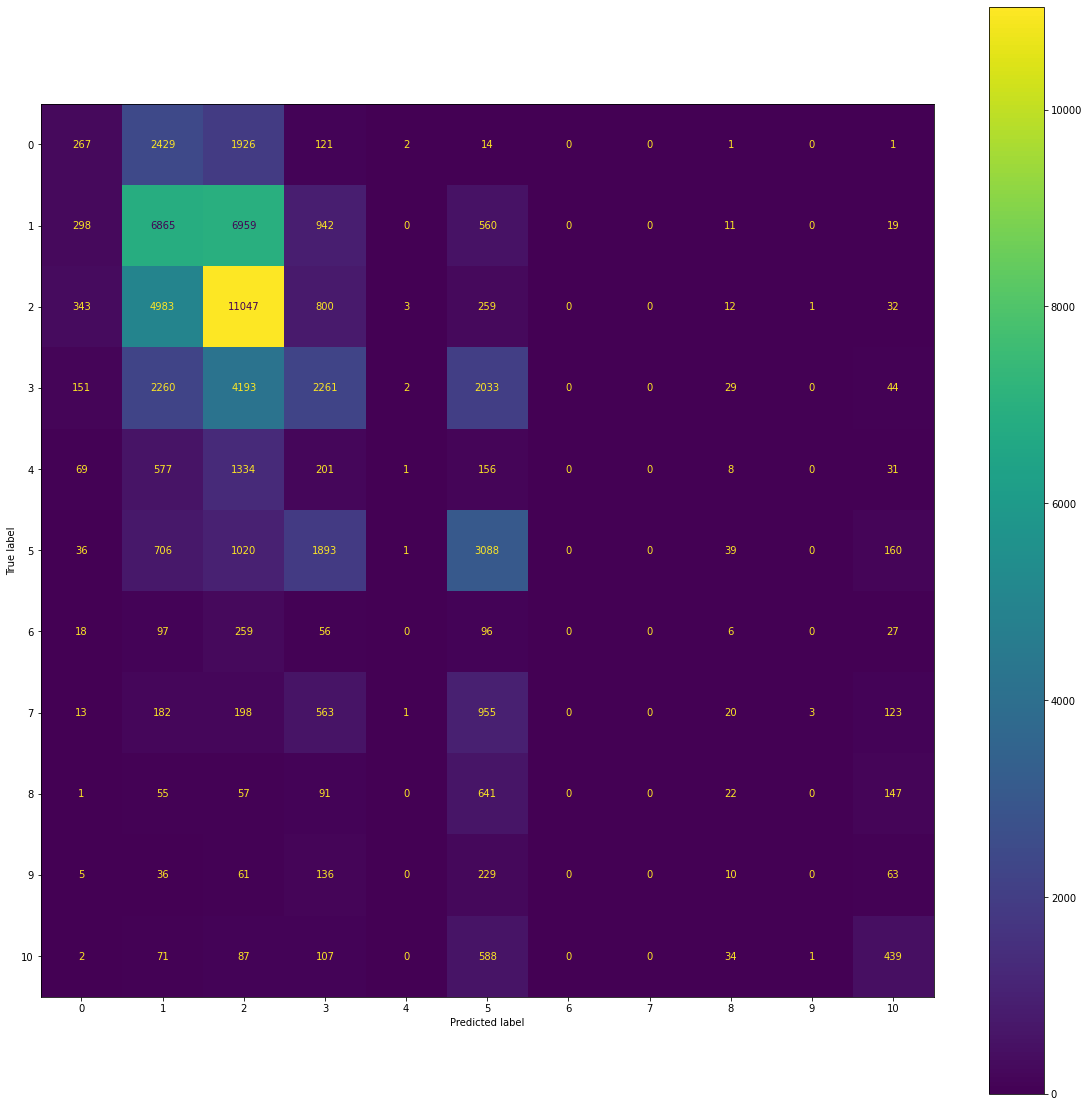

<Figure size 432x288 with 0 Axes>

In [96]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(ada,X_test,y_test,ax=ax)

### XgBoost Classifier

In [97]:
import xgboost as xgb

In [98]:
xgbcl=xgb.XGBClassifier(max_depth=10, objective='multi:softmax', n_estimators=40,random_state=42)
xgbcl.fit(X_train,y_train)
xgbpred=xgbcl.predict(X_test)

#### Classification report

In [99]:
print (classification_report(y_test, xgbpred))

              precision    recall  f1-score   support

           0       0.40      0.17      0.24      4761
           1       0.41      0.49      0.45     15654
           2       0.42      0.64      0.51     17480
           3       0.40      0.23      0.29     10973
           4       0.10      0.00      0.01      2377
           5       0.40      0.47      0.44      6943
           6       0.07      0.00      0.00       559
           7       0.24      0.04      0.06      2058
           8       0.34      0.21      0.26      1014
           9       0.27      0.02      0.04       540
          10       0.55      0.41      0.47      1329

    accuracy                           0.42     63688
   macro avg       0.33      0.24      0.25     63688
weighted avg       0.39      0.42      0.38     63688



#### Confusion Matrix

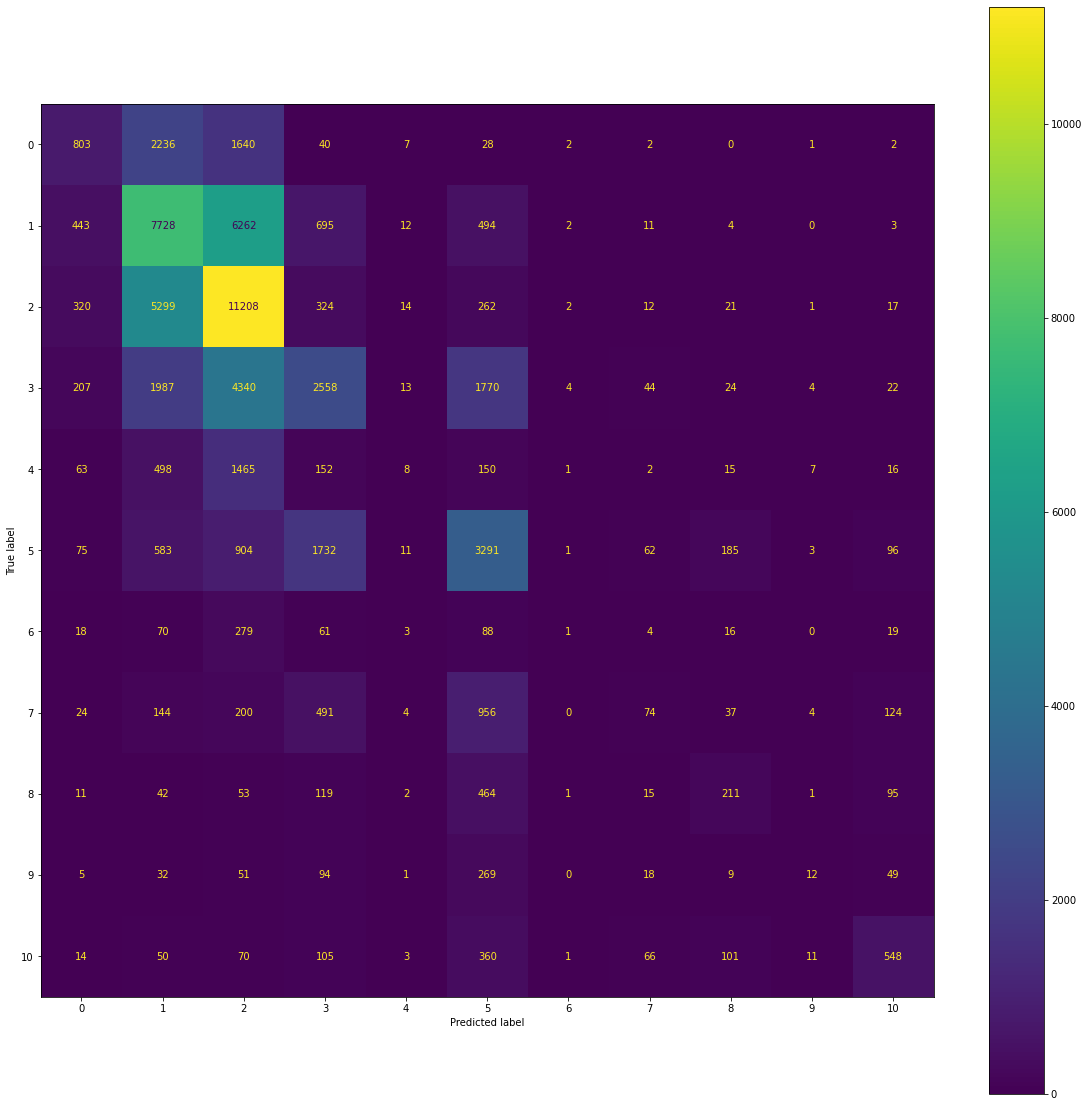

<Figure size 432x288 with 0 Axes>

In [100]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(xgbcl,X_test,y_test,ax=ax)

#### GridSearch CV for XG Boost

In [101]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from scipy.stats import chi2

In [102]:
#search_space = [
#  {
#    'clf__n_estimators': [40,60,100],
#    'clf__learning_rate': [ 0.3],
#    'clf__max_depth': range(5,7,10),
#    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
#    'clf__gamma': [i/10.0 for i in range(3)],
#    'fs__score_func': [chi2]
#  }
#]

#kfold = KFold(n_splits=3)
#scoring = {'Accuracy':make_scorer(accuracy_score)}

#xgcv=GridSearchCV(
#  estimator=xgb.XGBClassifier(objective='multi:softmax',random_state=42),
#  param_grid=search_space,
#  cv=kfold,
#  scoring=scoring,
#  verbose=1,
#  refit='Accuracy',
#   n_jobs=-1
#)
#xgcv.fit(X_train,y_train)
#xgcv.best_params_
#xgcv1=xgb.XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=40,random_state=42,gamma=0.0,colsample_bytree=0.1,learning_rate=0.3)
#xgcv1.fit(X_train,y_train)
#xgcv1pred=xgcv1.predict(X_test)
#xgcv1.score(X_test,y_test)
#print (classification_report(y_test, xgcv1pred))


### Catboost Classifier

In [103]:
from catboost import CatBoostClassifier

In [104]:
cat = CatBoostClassifier(verbose=0, n_estimators=100)
cat.fit(X_train,y_train)
catpred=cat.predict(X_test)


#### Classification Report

In [105]:
print (classification_report(y_test, catpred))

              precision    recall  f1-score   support

           0       0.41      0.17      0.24      4761
           1       0.41      0.50      0.45     15654
           2       0.42      0.64      0.51     17480
           3       0.41      0.23      0.30     10973
           4       0.13      0.00      0.00      2377
           5       0.40      0.47      0.43      6943
           6       0.17      0.00      0.00       559
           7       0.29      0.02      0.04      2058
           8       0.37      0.22      0.27      1014
           9       0.32      0.01      0.02       540
          10       0.54      0.42      0.47      1329

    accuracy                           0.42     63688
   macro avg       0.35      0.24      0.25     63688
weighted avg       0.40      0.42      0.38     63688



#### Confusion Matrix

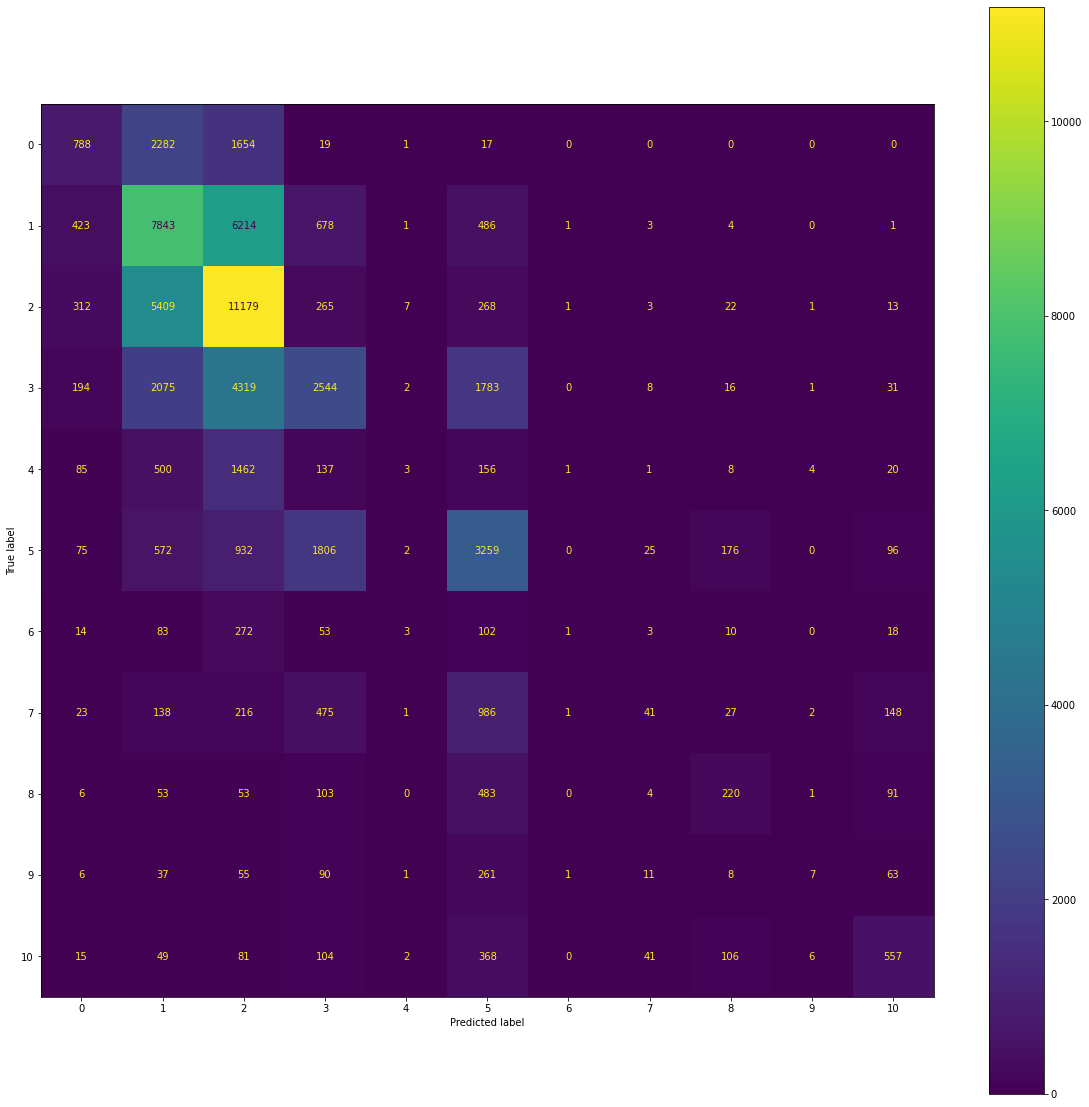

<Figure size 432x288 with 0 Axes>

In [106]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cat,X_test,y_test,ax=ax)

#### GridSearch CV for Catboost Classifier

In [107]:
# clf = CatBoostClassifier()
# params = {'depth': [4, 5, 6],
#           'l2_leaf_reg': np.logspace(-20, -19, 3),
#           'leaf_estimation_iterations': [5],
#           'random_seed': [42],
#           'n_estimators':[80,100,120]
#          }
# scorer = make_scorer(accuracy_score)
# catcv = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=3,verbose=True)
# catcv.fit(X_train,y_train)

In [108]:
#catcv.best_params_
#catcv.best_estimator_.fit(X_train,y_train)
#catcv.best_estimator_.score(X_test,y_test)


## Predictions on Test Data

Now we'll make predictions on the test data given to us.

In [109]:
predictions=cat.predict(df2)

In [123]:
Pred=np.ravel(predictions)

In [125]:
df2['Length of Stay']=le.inverse_transform(Pred)

In [132]:
df2[['Length of Stay']].head(15)

,Length of Stay
0,0-10
1,51-60
2,21-30
3,21-30
4,51-60
5,21-30
6,21-30
7,11-20
8,21-30
9,11-20
